In [2]:
import sys
sys.path.append("../..")

from MPyDATA.mpdata_factory import MPDATAFactory
from MPyDATA.fields.scalar_field import ScalarField
from MPyDATA.fields.vector_field import VectorField
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class Setup():
    nt = 1600
    dt = 1 
    nx = 500
    C = 0.5 
    x_min = -250
    x_max = 250

def cdf_cosine(x):
    x_mid = -150
    f = 2/12
    amplitude = 2

    pdf = np.where(
        np.abs(x-x_mid) < 10, 
        amplitude * np.cos(f*(x-x_mid)), 
        0)
    return np.cumsum(pdf)

def cdf_rect(x):
    x_mid = -150
    amplitude = 2
    offset = 2

    pdf = offset + np.where(
        np.abs(x-x_mid) <= 10, 
        amplitude, 
        0)
    return np.cumsum(pdf)


In [11]:
x = np.linspace(Setup.x_min, Setup.x_max, Setup.nx)

data = cdf_cosine(x)
halo = 0
shape = data.shape
G = ScalarField(np.ones(shape), halo=halo)

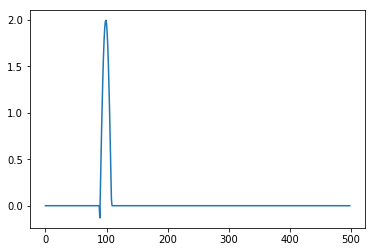

In [12]:
def state(cdf, r):
    return (np.diff(cdf(r)) / np.diff(r))

data = state(cdf_cosine, x)
plt.plot(data)

In [13]:
sfield = ScalarField(data, halo)
vfield = VectorField(data = .5 * np.ones(shape), halo = halo)

ValueError: 

In [14]:
mpdata = MPDATAFactory.mpdata(GC_field=vector_field, state=scalar_field, g_factor=G, n_iters=1)
mpdata.debug_print()
for _ in range(n_steps):
    mpdata.step()
mpdata.debug_print()

NameError: name 'vector_field' is not defined